In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Wir betrachten einen Datensatz mit mehr als 260.000 Einträgen von Waffengewalt in den USA zwischen Januar 2013 und März 2018.

Quelle: http://www.gunviolencearchive.org

In [2]:
data = pd.read_csv('gun-violence-data_01-2013_03-2018.csv', parse_dates=['date'])

In [3]:
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
print('Größe der Tabelle: ', data.shape)

Größe der Tabelle:  (239677, 29)


Der Datensatz besitzt insgesamt 239.677 Zeilen und 29 Spalten, wobei jede Zeile ein Fall von Waffengewalt darstellt.

In [5]:
data.drop(columns=['incident_url', 'source_url', 'incident_url_fields_missing', 'sources'], inplace=True)

Es werden 4 Spalten aus der Tabelle entfernt, die keinen Nutzen für die Analyse darstellen.

In [6]:
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,...,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,...,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [7]:
print('Größe der Tabelle: ', data.shape)

Größe der Tabelle:  (239677, 25)


Die Tabelle besitzt nun insgesamt 239.677 Zeilen und 25 Spalten.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 25 columns):
incident_id                 239677 non-null int64
date                        239677 non-null datetime64[ns]
state                       239677 non-null object
city_or_county              239677 non-null object
address                     223180 non-null object
n_killed                    239677 non-null int64
n_injured                   239677 non-null int64
congressional_district      227733 non-null float64
gun_stolen                  140179 non-null object
gun_type                    140226 non-null object
incident_characteristics    239351 non-null object
latitude                    231754 non-null float64
location_description        42089 non-null object
longitude                   231754 non-null float64
n_guns_involved             140226 non-null float64
notes                       158660 non-null object
participant_age             147379 non-null object
participant_ag

In [9]:
absolut = data.isnull().sum().sort_values(ascending=False)
relative = round(data.isnull().sum() / data.shape[0] *100, 2).sort_values(ascending=False)
NotaNumber = pd.concat([absolut, relative], axis=1, keys=['Absolut', 'Relativ'])
NotaNumber

,Absolut,Relativ
participant_relationship,223903,93.42
location_description,197588,82.44
participant_name,122253,51.01
gun_stolen,99498,41.51
gun_type,99451,41.49
n_guns_involved,99451,41.49
participant_age,92298,38.51
notes,81017,33.80
participant_age_group,42119,17.57
state_house_district,38772,16.18


In dieser Tabelle können wir die absolute Anzahl und relative Anteile der nicht vorhandenen Werte (NaN) in einer Variable ablesen. Zum Beispiel sind 93,42% alle Werte in der Variable 'participant relationship' nicht vorhanden.

In [10]:
data['date'].describe()

count                  239677
unique                   1725
top       2017-01-01 00:00:00
freq                      342
first     2013-01-01 00:00:00
last      2018-03-31 00:00:00
Name: date, dtype: object

-  Die meisten Waffengewalttaten (342-mal) traten am 1. Januar 2017 auf.

### Wie hat sich die Anzahl der Waffengewalt Vorkommen von Jahr 2013 bis 31.März 2018 in den USA entwickelt?

In [11]:
data['year'] = data['date'].dt.year
pd.DataFrame(data.year.value_counts())

,year
2017,61401
2016,58763
2015,53579
2014,51854
2018,13802
2013,278


Text(0,0.5,'Waffengewalt Vorkommnisse')

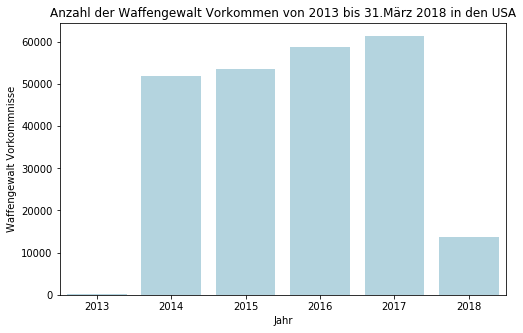

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(data['year'], color='lightblue')
ax.set_title('Anzahl der Waffengewalt Vorkommen von 2013 bis 31.März 2018 in den USA')
ax.set_xlabel('Jahr')
ax.set_ylabel('Waffengewalt Vorkommnisse')

-  Es sind nur wenige Datenwerte für das Jahr 2013 im Datensatz vorhanden.  
-  Zwischen den Jahren 2014 bis 2017 sehen wir eine Tendenz eines Anstiegs von Waffengewalt in den USA.  
-  Das Jahr 2017 hat die größte Anzahl von Waffengewalt Vorkommnisse mit 61.401 Fällen.
-  Für das Jahr 2018 sind nur Werte bis zum 31.März vorhanden.

### Welcher US-Staat hat die höchste Anzahl von Waffengewalt Vorkommnisse?

[]

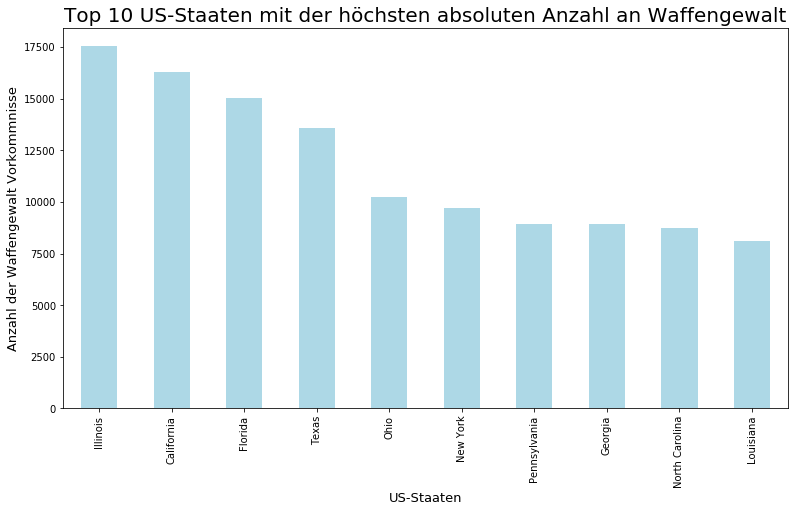

In [13]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = data.state.value_counts().sort_values(ascending=False).head(10).plot.bar(color='lightblue')
ax.set_title('Top 10 US-Staaten mit der höchsten absoluten Anzahl an Waffengewalt', fontsize = 20)
ax.set_ylabel('Anzahl der Waffengewalt Vorkommnisse', fontsize = 13)
ax.set_xlabel('US-Staaten', fontsize = 13)
plt.plot()

- Der Staat Illinois hat die größte Anzahl von Waffengewalt Vorkommnissen in den USA mit 17.500 Fällen.

### Wir betrachten jetzt die Waffengewalt je 100.000 Einwohner.

Es werden zusätzliche Daten für die Größe der Bevölkerung in je US-Staat beschafft.

Quelle: https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/state/asrh/

In [14]:
pop17 = pd.read_csv('scprc-est2017-18+pop-res.csv')
violence = data.state.value_counts()
population17 = pop17[['NAME', 'POPESTIMATE2017']].set_index('NAME')
population17
newtab = pd.concat([violence, population17], axis=1)
newtab['viop100k'] = round((newtab['state'] / newtab['POPESTIMATE2017']) * 100000, 0)


[]

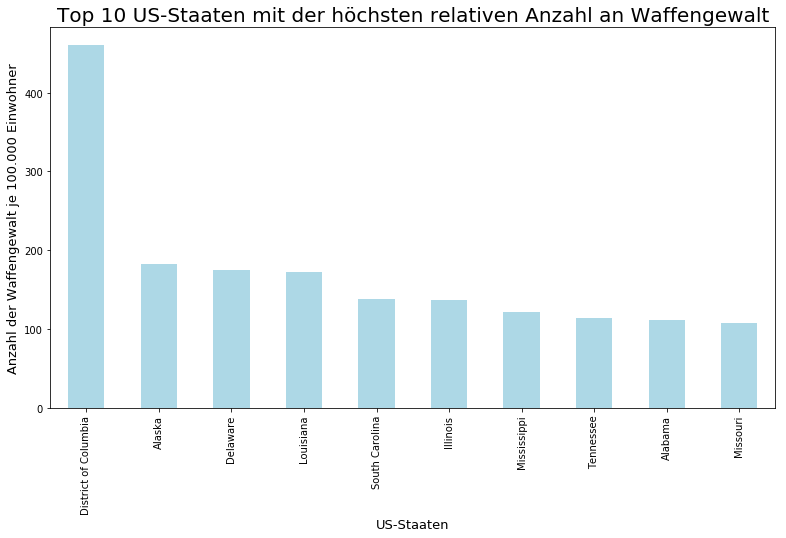

In [15]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = newtab.sort_values('viop100k', ascending=False)['viop100k'].head(10).plot.bar(color='lightblue')
ax.set_title('Top 10 US-Staaten mit der höchsten relativen Anzahl an Waffengewalt', fontsize = 20)
ax.set_ylabel('Anzahl der Waffengewalt je 100.000 Einwohner', fontsize = 13)
ax.set_xlabel('US-Staaten', fontsize = 13)
plt.plot()

Der 'District of Columbia' ist ein 'federal district', d.h. es ist kein US-Staat.  
Der Staat Alaska hat die meisten Waffengewalttaten je 100.000 Einwohner.  

-  60% der Einwohner in Alaska besitzen eine Schusswaffe.
-  Alaska hat die höchste Suizidrate in den USA, fast doppelt so viel wie der Durchschnitt. Über 80% der Tode durch Schusswaffen sind selbst zugefügt.
-  Alaska hat liberale Waffengesetze.
   
Nach dieser Quelle:http://www.businessinsider.com/the-state-where-youre-most-likely-to-be-killed-by-a-gun-is-one-of-the-most-beautiful-places-on-earth-2015-6?international=true&r=US&IR=T



### US-Staaten mit den meisten getöteten und verletzten Menschen durch Waffengewalt.

In [16]:
nkill = data[['state', 'n_killed']].groupby(['state']).sum().sort_values(by='n_killed', ascending=False).head(10)

nbubu = data[['state', 'n_injured']].groupby(['state']).sum().sort_values(by='n_injured', ascending=False).head(10)

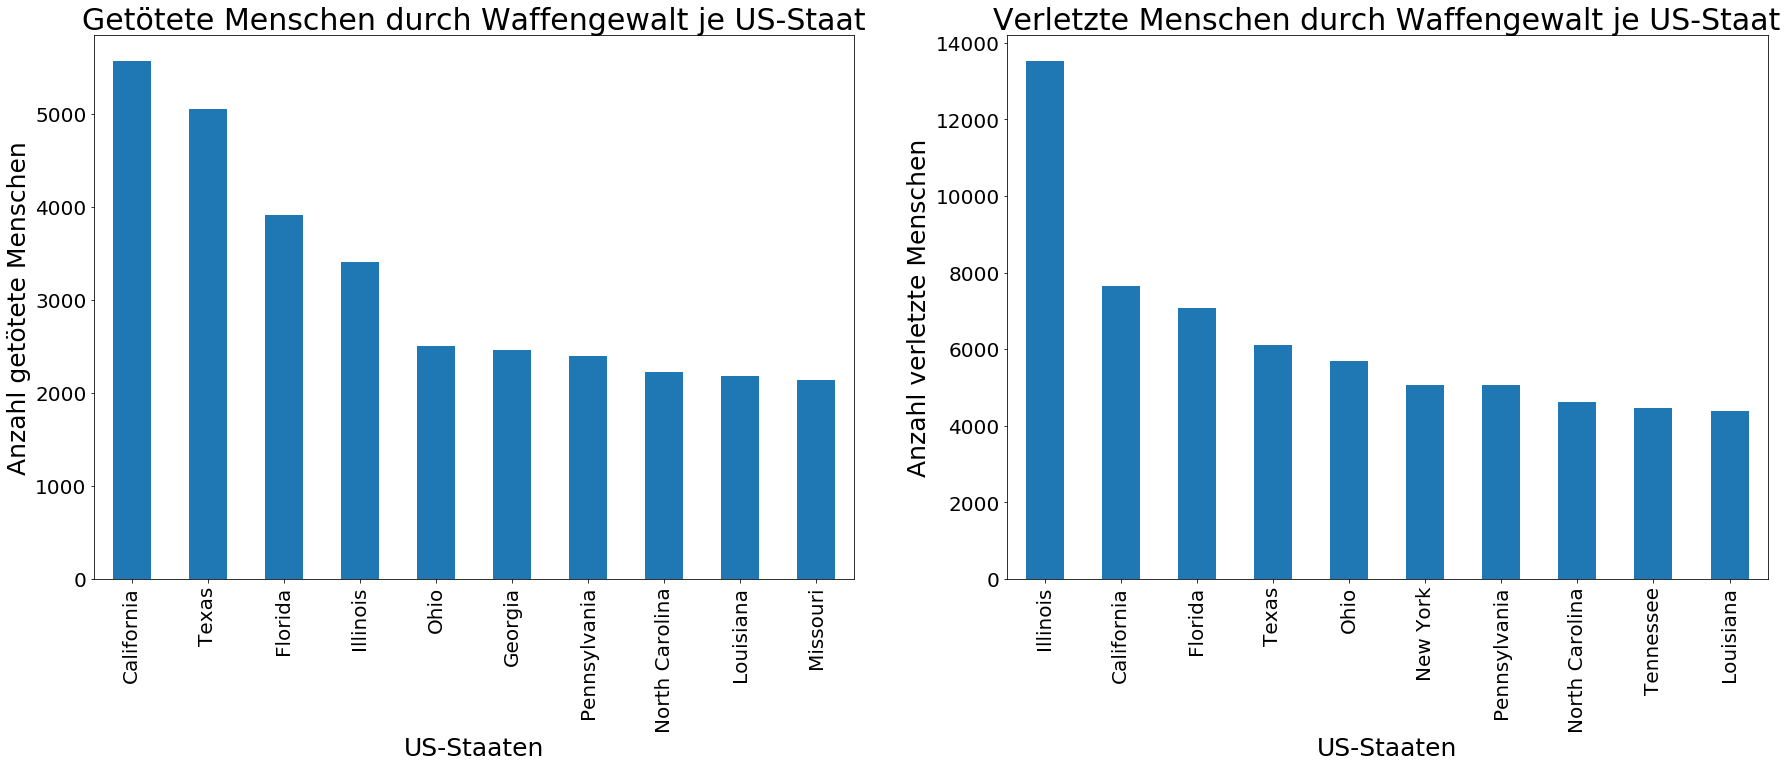

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
nkill.plot.bar(ax=ax[0], legend=False)
ax[0].set_title('Getötete Menschen durch Waffengewalt je US-Staat', fontsize=30)
ax[0].set_ylabel('Anzahl getötete Menschen', fontsize=25)
ax[0].set_xlabel('US-Staaten', fontsize=25)
ax[0].tick_params(labelsize=20)
nbubu.plot.bar(ax=ax[1], legend=False)
ax[1].set_title('Verletzte Menschen durch Waffengewalt je US-Staat', fontsize=30)
ax[1].set_ylabel('Anzahl verletzte Menschen', fontsize=25)
ax[1].set_xlabel('US-Staaten', fontsize=25)
ax[1].tick_params(labelsize=20)

- Der US-Staat Illinois, mit den meisten Waffengewalt Vorkommnissen, hat mit Abstand die größte Anzahl verletzter Menschen, aber liegt 'nur' auf den vierten Platz der am meisten getöteten Menschen durch Waffengewalt.

### Wie viele Menschen werden je Waffengewalt Vorkommnis getötet?

In [18]:
data['n_killed'].mean()

0.25228953967214207

- Es werden durchschnittlich 0,25 Menschen je Waffengewalt Vorkommnis getötet, wobei die Interpretation fraglich ist, weil es nur ganze und keine 0,25 Menschen gibt.
- Das arithmetische Mittel (Durchschnitt) ist anfällig für Ausreißer und somit kein robuster Lageparameter.
- Der Median ist bei vielen Ausreißer in der statistischen Verteilung ein geeigneteres Maß.


In [19]:
data['n_killed'].median()

0.0

- Der Median ist der Wert in einer sortierten statistischen Reihe, die genau in der Mitte liegt.
- Nach dem Median werden im Mittel 0 Menschen pro Vorfall getötet.
- Anhand der beiden Lageparameter ist zu erkennen, dass die statische Verteilung nach 0 tendiert.

In [20]:
absolut = data['n_killed'].value_counts()
relativ = round(data['n_killed'].value_counts() / data.shape[0] * 100, 4)
nkilled = pd.concat([absolut, relativ], axis = 1, keys = ['Absolut', 'Relativ (%)'])
nkilled

,Absolut,Relativ (%)
0,185835,77.5356
1,48436,20.2089
2,4604,1.9209
3,595,0.2483
4,139,0.0580
5,41,0.0171
6,11,0.0046
8,5,0.0021
9,3,0.0013
7,2,0.0008


- In 77,54% aller Waffengewalt Fällen in den USA werden keine Menschen getötet. 
- Mehr als zwei Personen pro Vorfall werden nur in seltensten Fällen getötet, d.h. die Wahrscheinlichkeiten liegen hier weit unter 1%.

### Welche US-Stadt hat die meisten Waffengewalt Vorkommnisse?

In [21]:
cities = data["city_or_county"].value_counts().head(10)

[]

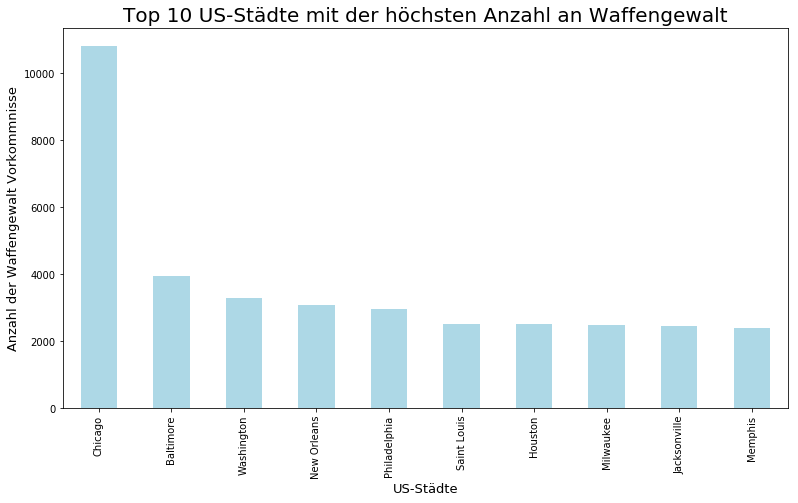

In [22]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = cities.plot.bar(color='lightblue')
ax.set_title('Top 10 US-Städte mit der höchsten Anzahl an Waffengewalt', fontsize = 20)
ax.set_ylabel('Anzahl der Waffengewalt Vorkommnisse', fontsize = 13)
ax.set_xlabel('US-Städte', fontsize = 13)
plt.plot()

- Chicago hat mit Abstand die meisten Waffengewalt Vorkommnisse.
- Im Vergleich sind es fast 3-mal so viele Waffengewalt Fälle in Chicago als bei anderen US-Städten.

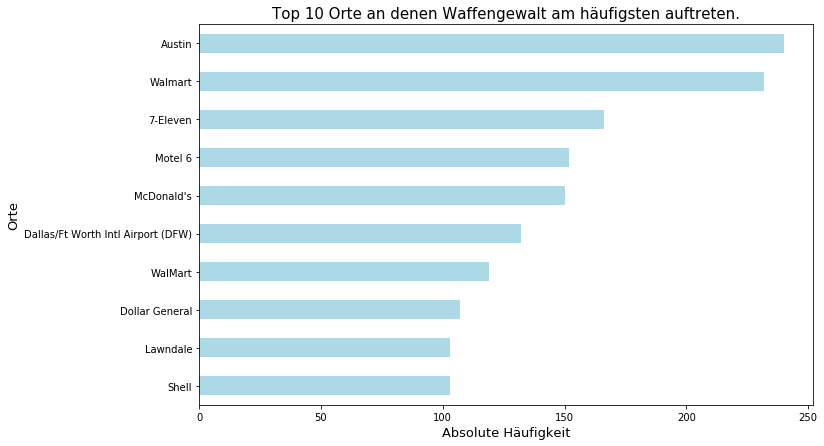

In [23]:
fig, ax = plt.subplots(figsize=(11, 7))
ax = data['location_description'].value_counts(ascending=False).head(10).plot.barh(color='lightblue')
ax.set_title('Top 10 Orte an denen Waffengewalt am häufigsten auftreten.', fontsize = 15)
ax.set_ylabel('Orte', fontsize = 13)
ax.set_xlabel('Absolute Häufigkeit', fontsize = 13)
plt.plot()
plt.gca().invert_yaxis()

In [24]:
data['location_description'].notnull().sum()

42089

Wenn man nur die Geschäfte betrachtet sind vor allem Supermärkte (Wal-Mart, 7-Eleven, Dollar General), Hotels (Motel 6), die Fast-Food-Ketten (McDonald's) und Tankstellen (Shell) betroffen.  
Wobei hier beachtet werden muss, dass nur 42.089 von 239.677 Datenwerten in dieser Variable vorhanden sind und das Ergebnis deshalb weniger repräsentativ für diesen Datensatz ist.